In [125]:
# This must be at first cell
# This is a cell to hide code snippets from displaying

from IPython.display import HTML

hide_me = ""
HTML(
    """<script>
showcode=true; 
function code_toggle() {
  if (showcode) {
    $('div.input').each(function(id) {
      el = $(this).find('.cm-variable:first');
      if (id == 0 || el.text() == 'hide_me') {
        $(this).hide();
      }
    });
    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
      $(this).show();
    });
    $('div.output_prompt').css('opacity', 1);
  }
  showcode = !showcode
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input style="opacity:0" type="submit" value="Click here to toggle on/off the raw code."></form>"""
)

<IPython.core.display.Javascript object>

In [2]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

# Last year, the number of software developers was estimated to be 26.4 million. The field thrives on open source tools & technologies, with new tools created every day. Given the sheer number of tools available, it's very possible that millions of unique combinations of these tools and technologies exist amongst software developers.

In [3]:
# Importing User-Defined Functions
import nbimporter

# Data Prepping
import numpy as np
from collections import Counter
import itertools
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc
from wordcloud import WordCloud, STOPWORDS
from sklearn.tree import plot_tree

# Data Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split as tts, cross_val_score

# K_Means
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# RFE
from sklearn.feature_selection import RFE, RFECV

# Factor Analysis
import pingouin as pg
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo

# Generating the Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Scoring the Models
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

from IPython.core.magic import register_cell_magic

import warnings
from colorama import Fore

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

### Setting up PySpark

In [4]:
import os

# Set spark environments
os.environ[
    "PYTHONPATH"
] = "%SPARK_HOME%\python;%SPARK_HOME%\python\lib\py4j-0.10.7-src.zip:%PYTHONPATH%"

<IPython.core.display.Javascript object>

In [5]:
import findspark

findspark.init("C:/spark/spark-2.4.7-bin-hadoop2.7")

<IPython.core.display.Javascript object>

In [6]:
import pyspark

from pyspark import SparkContext

sc = SparkContext()

<IPython.core.display.Javascript object>

In [7]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext

from pyspark.sql.types import DoubleType
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import functions as F
from pyspark.sql.functions import udf

from pyspark.ml.classification import LogisticRegression
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import (
    BinaryClassificationEvaluator,
    MulticlassClassificationEvaluator,
)
from pyspark.mllib.evaluation import MultilabelMetrics

<IPython.core.display.Javascript object>

# This project applies Data Cleaning, Exploratory Data Analysis & Machine Learning techniques to better understand the connection between a developer's tools and their profile type.
<br>

# The Presentation
Overview of the Data
<ul>
<li>Top Skills</li>
<li>Top Profiles</li>
</ul>
 
Defining our Dataset
 - Database
 - Machine Learning (ML)
 - Quality Assurance (QA)
 - Frontend
 - Fullstack

<br>Transforming the Data<br><br>
Reducing Noise with Feature Selection<br><br>



# The Machine Learning Models

### Logistic Regression

    Class Balance
    Benchmark Model
    Scoring with the ROC Curve
    Class Imbalance with PySpark
    Model Performance Metrics (@TODO incorporate some of what I added to logreg notebooks)

### Binary Decision Tree 

    Benchmark Model
    Model Performance with the Classification Report
    Scoring with ROC_AUC
    Visualizing the Decision Tree
    Model Performance Metrics (@TODO incorporate some of what I added to dtree notebooks)

### Multinomial (Multi-class) Random Forest

    Benchmark Model
    Model Performance with the Classification Report

# The Data

In [8]:
hide_me
data_overview = pd.read_csv("../Celerative_Working/Data_Cleaning/data_overview.csv")
data_overview.drop(["Unnamed: 0"], axis=1, inplace=True)
data_overview.head(5)

name  \
0                Hugo L. Samayoa   
1               Stepan Yakovenko   
2                 Slobodan Gajic   
3  Bruno Furtado Montes Oliveira   
4                Jennifer Aquino   

                                        profile  \
0                              DevOps Developer   
1                            Software Developer   
2                            Software Developer   
3  Visual Studio Team Services (VSTS) Developer   
4                  Query Optimization Developer   

                                              skills  
0  ['Agile Software Development', 'Kubernetes', '...  
1  ['Debian Linux', 'MySQL', 'HTML5', 'GWT', 'Aja...  
2  ['Firebase', 'JSON', 'CSS', 'Angular', 'jQuery...  
3  ['Agile', 'Debian Linux', 'PostgreSQL', 'Pytho...  
4  ['Automation', 'SQL Server Integration Service...

<IPython.core.display.Javascript object>

# How An Algorithm sees the Data

| Observations or Samples   | Classes, Predicted vs. Actual (y)| Features (X)                 |
|---------------------------|----------------------------------|------------------------------|
| observation #1            | profile_A                        | skill_1, skill_5, skill_3... |
| observation #2            | profile_B                        | skill_5, skill_2, skill_4... |
| observation #3            | profile_C                        | skill_4, skill1_2, skill_1...|
| observation #4            | profile_B                        | skill_4, skill1_1, skill_5...|
| observation #5            | profile_A                        | skill_3, skill1_4, skill_5...|

# Data Cleaning

# Noise is data which does not add meaningful information for the algorithm. 
<br>

# Controlling for noise yields more reliable predictive analysis when applying Machine Learning algorithms.



# This is an example of noisy data. Left unchecked, this could cause the algorithm to return results which don't acurately reflect the true data:

|Similar|Strings|
|---------|-------|
|'apache' |'apache spark'     |
|'apache ant'|'apache tomcat'|
|'rest'   |'rest apis'     |
|'android studio'   |'android'     |'android sdk'     |
|'asp.net mvc' |'asp.net'     |'asp'|
|'visual studio code'   |'microsoft visual studio'     |
|'angular js' |'angular'     |
|'c#'   |'c'     |'c++'|
|'asp.net mvc' |'asp.net'     |
|'google app engine'   |'google cloud'     |'google compute engine'|
|'google analytics'|'google adsense'|'google adwords',
|'phpstorm'|'php'|
|'net'|'net framework'|
|'aws ec2'|'aws s3|

# Before

In [9]:
print("Before the data was cleaned and processed, the dataset consisted of:\n")
print(
    "\t - ",
    data_overview.profile.nunique(),
    'unique profile types or "classes" \n',
)
print("\t & ")
print(
    "\n\t - ",
    data_overview.skills.explode().nunique(),
    'skills or "features"',
)

Before the data was cleaned and processed, the dataset consisted of:

	 -  2672 unique profile types or "classes" 

	 & 

	 -  5496 skills or "features"


<IPython.core.display.Javascript object>

In [10]:
# Read Clean Data
clean_talentpool = pd.read_csv("1000_profiles/all_profiles.csv")

<IPython.core.display.Javascript object>

In [11]:
# Drop added column
clean_talentpool.drop(["Unnamed: 0"], axis=1, inplace=True)
# Split str col to list col
clean_talentpool["skills"] = clean_talentpool["skills"].apply(lambda x: x.split(","))

<IPython.core.display.Javascript object>

# After

In [12]:
print(
    "Using Natural Language Processing and Text Pre-Processing techniques provided via the Scikit-Learn library, skills & profile strings were standardized to:"
)
print("\t - ", clean_talentpool.profile.nunique(), "profiles (classes)")
print("\t & ")
print("\t - ", clean_talentpool.skills.explode().nunique(), "skills (features)")

Using Natural Language Processing and Text Pre-Processing techniques provided via the Scikit-Learn library, skills & profile strings were standardized to:
	 -  415 profiles (classes)
	 & 
	 -  780 skills (features)


<IPython.core.display.Javascript object>

# Top Skills

In [13]:
# Import user-defined functions
import functions

from functions import series_to_str, plot_cloud

SELFTIMED: 0.0029578208923339844
['javascript frontend design', 'android ios javascript', 'android developer', 'android developer developer', 'architecture developer', 'big data architecture developer', 'data architecture developer', 'software architecture developer', 'javascript python data science', 'javascript android ios', 'frontend design javascript', 'java python data science', 'php python data science']
SELFTIMED: 0.0029914379119873047
['frontend design javascript', 'javascript android ios', 'android developer', 'android developer developer', 'architecture developer', 'big data architecture developer', 'data architecture developer', 'software architecture developer', 'javascript python data science', 'android ios javascript', 'javascript frontend design', 'java python data science', 'php python data science']
SELFTIMED: 0.0010025501251220703
False


<IPython.core.display.Javascript object>

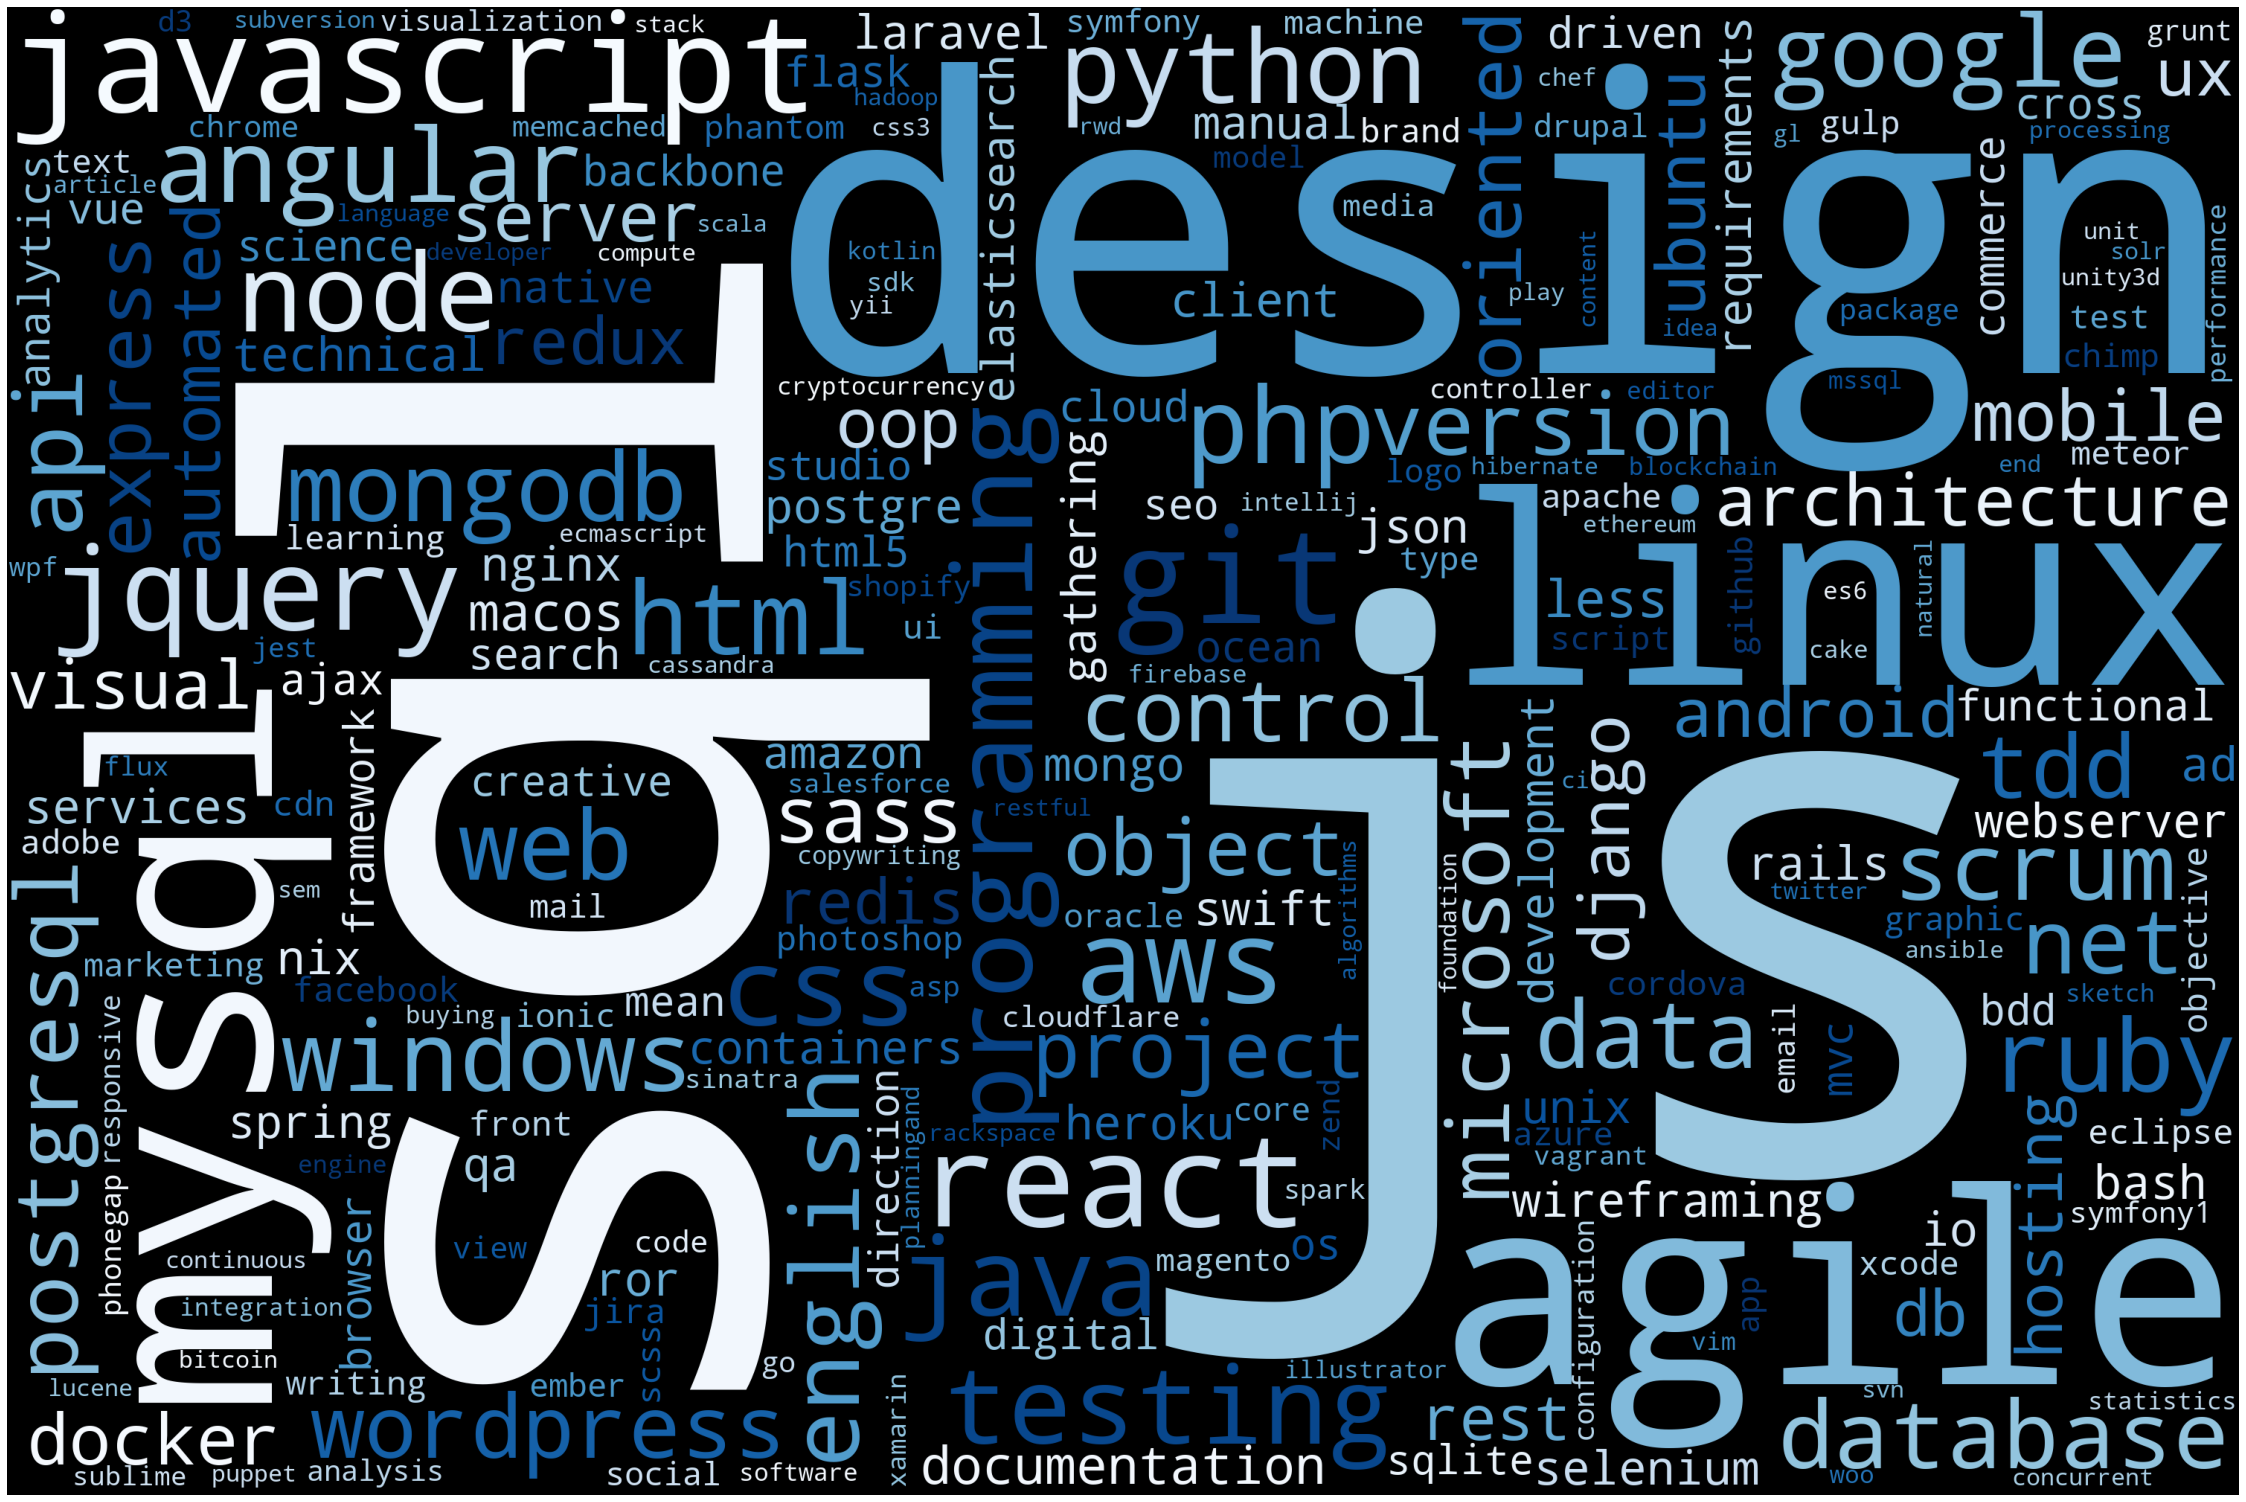

<IPython.core.display.Javascript object>

In [14]:
hide_me
# Generating wordcloud
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    max_words=250,
    background_color="black",
    colormap="Blues",
    collocations=False,
    stopwords=STOPWORDS,
).generate(
    series_to_str(clean_talentpool["skills"])
)  # Plot
plot_cloud(wordcloud)

# Top Profiles

In [15]:
# Importing user defined functions
from functions import (
    key_phrase_combo,
    generating_keywords_str,
    prof_keywords_counted_sorted,
)

<IPython.core.display.Javascript object>

In [16]:
hide_me
pd.DataFrame(clean_talentpool["profile"].value_counts())[1:19]

profile
quality assurance                79
front-end developer              69
javascript developer             64
ios developer                    55
full-stack developer             54
frontend php javascript          51
machine learning engineer        50
python developer                 48
php developer                    47
java developer                   41
android developer                31
javascript frontend design       28
c# developer                     24
ruby on rails developer          22
architecture developer           22
software architect               21
design                           20
ajax developer                   19

<IPython.core.display.Javascript object>

It's clear that a few of the top profile types are described by their **key skills only**, such as "frontend php javascript" , "javascript frontend design", etc. These top "keywords" may reveal more than about the data's profiles when isolated from non-descritptive words like "developer" and "engineer".

In [17]:
dotplot = functions.prof_keywords_counted_sorted(
    generating_keywords_str(clean_talentpool["profile"])
)

<IPython.core.display.Javascript object>

In [18]:
hide_me
# Drop empty row & subsetting for top 25 keywords
dotplot.drop(14, inplace=True)
dotplot.reset_index(drop=True)[:25]

profile_keywords  count
0         javascript    411
1           frontend    339
2                php    164
3             design    157
4          fullstack    150
5                ios    119
6             senior    118
7             python    102
8               java     97
9               ruby     91
10           android     90
11               web     87
12  qualityassurance     79
13              data     77
14               net     73
15   machinelearning     60
16            devops     56
17      architecture     53
18                 c     43
19             rails     37
20            middle     36
21           backend     30
22           testing     30
23         wordpress     30
24            system     27

<IPython.core.display.Javascript object>

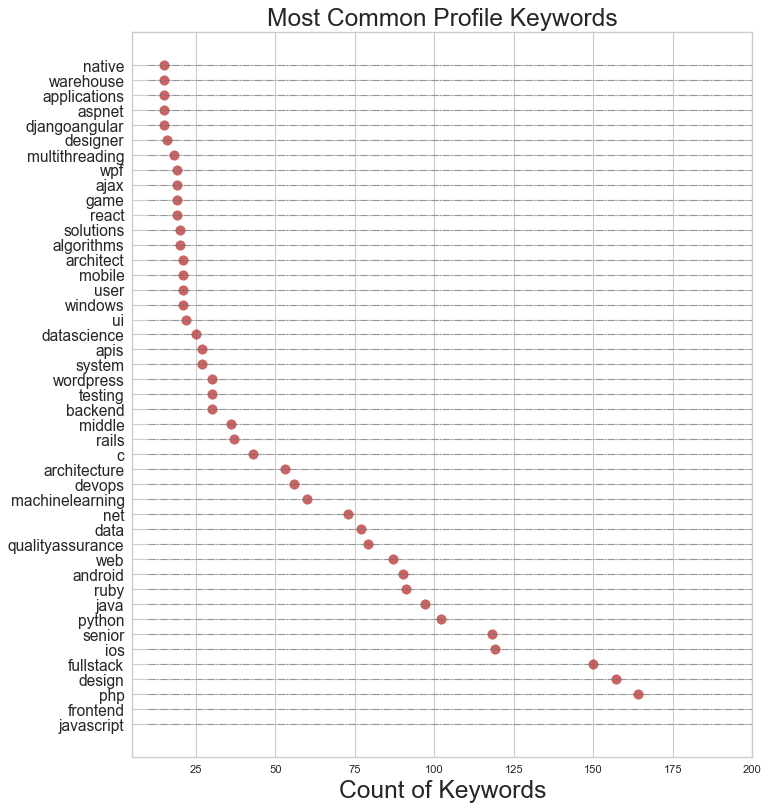

<IPython.core.display.Javascript object>

In [19]:
hide_me
# Draw plot
y = dotplot.profile_keywords[:45]

fig, ax = plt.subplots(figsize=(10, 12), dpi=80)
ax.hlines(
    y=y,
    xmin=10,
    xmax=205,
    color="gray",
    alpha=0.7,
    linewidth=1,
    linestyles="dashdot",
)
ax.scatter(
    y=y,
    x=dotplot.loc[:45, ["count"]],
    s=75,
    color="firebrick",
    alpha=0.7,
)

# Title, Label, Ticks and Ylim
ax.set_title("Most Common Profile Keywords", fontdict={"size": "22"})
ax.set_xlabel("Count of Keywords", fontdict={"size": "22"})
ax.set_yticklabels(y, fontdict={"horizontalalignment": "right", "size": "14"})
ax.set_xlim(5, 200)
plt.show()

In [20]:
# Importing user-defined functions
import functions

from functions import (
    profile_standardized_col,
    database_profile,
    frontend_profile,
    qa_profile,
    ml_profile,
    fullstack_profile,
    cleaned_skills_list,
)

<IPython.core.display.Javascript object>

In [21]:
# Creating the dataset
five_profiles = pd.concat(
    [
        database_profile(clean_talentpool),
        frontend_profile(clean_talentpool),
        qa_profile(clean_talentpool),
        ml_profile(clean_talentpool),
        fullstack_profile(clean_talentpool),
    ]
)

<IPython.core.display.Javascript object>

# Defining our Dataset

#### For the purposes of this presentation, we will narrow our focus to look at machine learning model performance using a dataset made up of five (5) profiles:
1. "Database"
2. "ML" combined those profiles containing the phrase "machine learning"
3. "QA" combined those profiles containing the phrase "quality assurance"
4. "Fullstack"
5. "Frontend"

# Makeup of the Dataset

In [22]:
# Get percentage of developer profile
(five_profiles.profile.value_counts(normalize=True) * 100).astype(int)


Frontend     48
Fullstack    21
QA           11
Database      9
ML            8
Name: profile, dtype: int32

<IPython.core.display.Javascript object>

In [23]:
# Expand the skills list col
ex_skills = five_profiles.explode("skills")
ex_skills = ex_skills.reset_index(drop=True)

<IPython.core.display.Javascript object>

In [24]:
print(
    "Although profile types have been cut to 5 broad profile categories, \
    \nthere are still",
    ex_skills.skills.nunique(),
    "skills (vs. the 812 seen with all profiles). \
    \nSo although many of the classes have been cut, most skills remain, \
    qualifying the exploration of this particular subset of the data as valid.",
)

Although profile types have been cut to 5 broad profile categories,     
there are still 527 skills (vs. the 812 seen with all profiles).     
So although many of the classes have been cut, most skills remain,     qualifying the exploration of this particular subset of the data as valid.


<IPython.core.display.Javascript object>

# Transforming the Data

### Our Data's Format
| Observations/Samples            | Classes (y)           | Features (X)                 |
|---------------------------------|-----------------------|------------------------------|
| observation #1                  | profile_A             | skill_1, skill_5, skill_3... |
| observation #2                  | profile_B             | skill_5, skill_2, skill_4... |
| observation #3                  | profile_C             | skill_4, skill1_2, skill_1...|
| observation #4                  | profile_B             | skill_4, skill1_1, skill_5...|
| observation #5                  | profile_A             | skill_3, skill1_4, skill_5...|

### Machine Learning Data Format
| Observations/Samples | Classes (y)  | Feature1 (X)| Feature2 (X)| Feature3 (X)| Feature4 (X)...
|----------------------|--------------|-------------|-------------|-------------|-------------
| observation #1       | profile_A    | skill_1     | skill_2     | skill_3     | skill_4   ...  
| observation #2       | profile_B    | skill_1     | skill_2     | skill_3     | skill_4   ...
| observation #3       | profile_C    | skill_1     | skill_2     | skill_3     | skill_4   ...
| observation #4       | profile_B    | skill_1     | skill_2     | skill_3     | skill_4   ...
| observation #5       | profile_A    | skill_1     | skill_2     | skill_3     | skill_4   ...

In [26]:
import functions
from functions import binarizer

<IPython.core.display.Javascript object>

# The Sci-Kit Learn MultiLabelBinarizer() Object

sklearn's MultiLabelBinarizer() Object is used to take each skill and expand it, so that each skill (feature) has its own column. Should that sample, or developer, have the specified skill, the corresponding row is marked with a 1. Otherwise, it's marked with a 0. <br>
This effectively converts all skills to binary variables, which allows the features (skills) to be represented on the x-axis, while observations are represented on the y-axis. Machine Learning algorithms need data formatted in this way in order to process it correctly.

# The Result

In [27]:
df = binarizer(ex_skills)
df.iloc[:, 1:8]


profile                                             skills  \
0    Fullstack       rest,visual studio code,json,full-stack,linq   
1     Frontend  html,ux design,javascript,type script,redux,an...   
2           ML  data science,linux,apache hive,python 3,machin...   
3           ML  data science,flask,mysql,python,linux rhel/cen...   
4           QA             javascript,ruby on rails (ror),jenkins   
..         ...                                                ...   
628   Database  data science,postgresql,r,aws lambda,optimization   
629   Frontend  html,javascript,php,laravel,wordpress,photosho...   
630   Frontend  html,java,spring,javascript,node,js,databases,...   
631   Frontend  html,automated testing,phantom js,wireframing,...   
632         ML  test-driven development (tdd),amazon web servi...   

                                           skills_list  .net  .net 4  \
0    [rest, visual studio code, json, full-stack, l...     0       0   
1    [html, ux design, javascript, type script, red...     0       0   
2    [data science, linux, apache hive, python 3, m...     0       0   
3    [data science, flask, mysql, python, linux rhe...     0       0   
4           [javascript, ruby on rails (ror), jenkins]     0       0   
..                                                 ...   ...     ...   
628  [data science, postgresql, r, aws lambda, opti...     0       0   
629  [html, javascript, php, laravel, wordpress, ph...     0       0   
630  [html, java, spring, javascript, node, js, dat...     0       0   
631  [html, automated testing, phantom js, wirefram...     0       0   
632  [test-driven development (tdd), amazon web ser...     0       0   

     .net core  .net framework  
0            0               0  
1            0               0  
2            0               0  
3            0               0  
4            0               0  
..         ...             ...  
628          0               0  
629          0               0  
630          0               0  
631          0               0  
632          0               0  

[633 rows x 7 columns]

<IPython.core.display.Javascript object>

# X 
is recognized as the variable which stores the "input variables", or features on which the algorithm is trained. <br> Here features are assigned to X:

In [28]:
# Assign features to X
X = df.iloc[:, 5:]
X


.net 4  .net core  .net framework  ad planningand buying  ado.net  \
0         0          0               0                      0        0   
1         0          0               0                      0        0   
2         0          0               0                      0        0   
3         0          0               0                      0        0   
4         0          0               0                      0        0   
..      ...        ...             ...                    ...      ...   
628       0          0               0                      0        0   
629       0          0               0                      0        0   
630       0          0               0                      0        0   
631       0          0               0                      0        0   
632       0          0               0                      0        0   

     adobe illustrator  adobe photoshop  affiliate marketing  afnetworking  \
0                    0                0                    0             0   
1                    0                0                    0             0   
2                    0                0                    0             0   
3                    0                0                    0             0   
4                    0                0                    0             0   
..                 ...              ...                  ...           ...   
628                  0                0                    0             0   
629                  0                0                    0             0   
630                  0                0                    0             0   
631                  0                0                    0             0   
632                  0                0                    0             0   

     agile  ...  writing  wwf  x  xamarin  xcode  xml  yii  zend framework  \
0        0  ...        0    0  0        0      0    0    0               0   
1        0  ...        0    0  0        0      0    0    0               0   
2        0  ...        0    0  0        0      0    0    0               0   
3        0  ...        0    0  0        0      0    0    0               0   
4        0  ...        0    0  0        0      0    0    0               0   
..     ...  ...      ...  ... ..      ...    ...  ...  ...             ...   
628      0  ...        0    0  0        0      0    0    0               0   
629      0  ...        0    0  0        0      0    0    0               0   
630      1  ...        0    0  0        0      0    0    0               0   
631      0  ...        0    0  0        0      0    0    0               0   
632      0  ...        0    0  0        0      0    0    0               0   

     zeplin  zurb foundation  
0         0                0  
1         0                0  
2         0                0  
3         0                0  
4         0                0  
..      ...              ...  
628       0                0  
629       0                0  
630       0                0  
631       0                0  
632       0                0  

[633 rows x 526 columns]

<IPython.core.display.Javascript object>

# y
is recognized as the variable which stores class labels in classification problems. <br> Here class labels are assigned to y:

In [29]:
# Assign target class to y
y = df.profile
y


0      Fullstack
1       Frontend
2             ML
3             ML
4             QA
         ...    
628     Database
629     Frontend
630     Frontend
631     Frontend
632           ML
Name: profile, Length: 633, dtype: object

<IPython.core.display.Javascript object>

# Now that the data has been formatted to be understandable to the algorithm, inconsistencies or noise in the data should be addressed.

# Feature Engineering or Feature Selection

involves choosing features of the data that are more relevant to the model performing well. <br>This makes data input to the model less noisy, lets the model train faster, simplifies the model for interpretation, and improves generalization to outside data.
### Recursive Feature Elimination (RFE)
### Correlation

## Correlation

In [30]:
# Create the correlation matrix
corr_matrix = X.corr()
# Subset the matrix
corr_matrix.iloc[:11, :11]


.net 4  .net core  .net framework  \
.net 4                 1.000000  -0.001582       -0.001582   
.net core             -0.001582   1.000000       -0.001582   
.net framework        -0.001582  -0.001582        1.000000   
ad planningand buying -0.007897  -0.007897       -0.007897   
ado.net               -0.001582  -0.001582       -0.001582   
adobe illustrator     -0.001582  -0.001582       -0.001582   
adobe photoshop       -0.004500  -0.004500       -0.004500   
affiliate marketing   -0.002745  -0.002745       -0.002745   
afnetworking          -0.001582  -0.001582       -0.001582   
agile                 -0.029539  -0.029539       -0.029539   
ajax                  -0.009329  -0.009329        0.169613   

                       ad planningand buying   ado.net  adobe illustrator  \
.net 4                             -0.007897 -0.001582          -0.001582   
.net core                          -0.007897 -0.001582          -0.001582   
.net framework                     -0.007897 -0.001582          -0.001582   
ad planningand buying               1.000000 -0.007897          -0.007897   
ado.net                            -0.007897  1.000000          -0.001582   
adobe illustrator                  -0.007897 -0.001582           1.000000   
adobe photoshop                    -0.022460 -0.004500          -0.004500   
affiliate marketing                 0.106738 -0.002745          -0.002745   
afnetworking                       -0.007897 -0.001582          -0.001582   
agile                               0.198199 -0.029539          -0.029539   
ajax                               -0.046556 -0.009329          -0.009329   

                       adobe photoshop  affiliate marketing  afnetworking  \
.net 4                       -0.004500            -0.002745     -0.001582   
.net core                    -0.004500            -0.002745     -0.001582   
.net framework               -0.004500            -0.002745     -0.001582   
ad planningand buying        -0.022460             0.106738     -0.007897   
ado.net                      -0.004500            -0.002745     -0.001582   
adobe illustrator            -0.004500            -0.002745     -0.001582   
adobe photoshop               1.000000            -0.007807     -0.004500   
affiliate marketing          -0.007807             1.000000     -0.002745   
afnetworking                 -0.004500            -0.002745      1.000000   
agile                        -0.054471             0.044868     -0.029539   
ajax                         -0.026533            -0.016183     -0.009329   

                          agile      ajax  
.net 4                -0.029539 -0.009329  
.net core             -0.029539 -0.009329  
.net framework        -0.029539  0.169613  
ad planningand buying  0.198199 -0.046556  
ado.net               -0.029539 -0.009329  
adobe illustrator     -0.029539 -0.009329  
adobe photoshop       -0.054471 -0.026533  
affiliate marketing    0.044868 -0.016183  
afnetworking          -0.029539 -0.009329  
agile                  1.000000 -0.144463  
ajax                  -0.144463  1.000000

<IPython.core.display.Javascript object>

In [31]:
# Selecting for those columns with correlation relationship less than 50%
columns = np.full((corr_matrix.shape[0],), True, dtype=bool)
for i in range(corr_matrix.shape[0]):
    for j in range(i + 1, corr_matrix.shape[0]):
        if corr_matrix.iloc[i, j] >= 0.5:
            if columns[j]:
                columns[j] = False

<IPython.core.display.Javascript object>

In [32]:
# Taking columns of low correlation and assigning back to X
selected_columns = X.columns[columns]
X = X[selected_columns]

<IPython.core.display.Javascript object>

By selecting for features more than 50% dissimilar, features have been reduced from 526 to 278, effectively reducing the "dimensionality" or column vectors of the dataset. This is one of an array of techniques known as Dimensionality Reduction techniques.

In [33]:
# newly selected features
X


.net 4  .net core  .net framework  ad planningand buying  ado.net  \
0         0          0               0                      0        0   
1         0          0               0                      0        0   
2         0          0               0                      0        0   
3         0          0               0                      0        0   
4         0          0               0                      0        0   
..      ...        ...             ...                    ...      ...   
628       0          0               0                      0        0   
629       0          0               0                      0        0   
630       0          0               0                      0        0   
631       0          0               0                      0        0   
632       0          0               0                      0        0   

     adobe illustrator  adobe photoshop  affiliate marketing  afnetworking  \
0                    0                0                    0             0   
1                    0                0                    0             0   
2                    0                0                    0             0   
3                    0                0                    0             0   
4                    0                0                    0             0   
..                 ...              ...                  ...           ...   
628                  0                0                    0             0   
629                  0                0                    0             0   
630                  0                0                    0             0   
631                  0                0                    0             0   
632                  0                0                    0             0   

     agile  ...  web developer  web gl  webpack  windows  windows mobile  \
0        0  ...              0       0        0        0               0   
1        0  ...              0       0        0        0               0   
2        0  ...              0       0        0        0               0   
3        0  ...              0       0        0        0               0   
4        0  ...              0       0        0        0               0   
..     ...  ...            ...     ...      ...      ...             ...   
628      0  ...              0       0        0        0               0   
629      0  ...              0       0        0        0               0   
630      1  ...              0       0        0        0               0   
631      0  ...              0       0        0        0               0   
632      0  ...              0       0        0        0               0   

     windows powershell  windows presentation foundation (wpf)  xamarin  xml  \
0                     0                                      0        0    0   
1                     0                                      0        0    0   
2                     0                                      0        0    0   
3                     0                                      0        0    0   
4                     0                                      0        0    0   
..                  ...                                    ...      ...  ...   
628                   0                                      0        0    0   
629                   0                                      0        0    0   
630                   0                                      0        0    0   
631                   0                                      0        0    0   
632                   0                                      0        0    0   

     zurb foundation  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
..               ...  
628                0  
629                0  
630                0  
631                0  
632                0  

[633 rows x 278 columns]

<IPython.core.display.Javascript object>

## Recursive Feature Elimination (RFE)

### Dimensionality Reduction, Matrix style

In [34]:
# Performing RFE
rForest = RandomForestClassifier()
rfe = RFE(rForest).fit(X, y)
# Rank of 1 indicates the features selected
rfe.ranking_


array([113,  23,   1,   1, 102,   1,   1, 133,  62,   1,   1, 128,  72,
         1,   1,  65,   1,  34,   1,   1,   1,   1,  76,   1,   1,   1,
         1,   1,   1,  42,  96,   1,   1,   1,   4,   1,   1,   1,   1,
         1,   1,   1,  87,   1,  49,  29,   1,   1, 125, 129, 112,   1,
       121,  10,   1,  95,  94,   1,   1, 124,  16,  59,   1,  56, 108,
         1,  44,   1,   1, 117,   1, 119,   1,   1, 122,   1,  89, 105,
         1, 140,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,  71,
         1,   1,   1,  99,   1,  75,  18,  32,   2,  33,  81,   1,  92,
         1,   1,   1,  38,  46,   1,   1,   1,   1,   1,   1,   1,  82,
         1,  25,   1,   5,   1,   1,  79,   1,   1, 127,  91,   1, 138,
       134,  55,  97,   1,   1,  64,  40,  85,   6,   1,  88,   1,   1,
        36,  84,   1,   1,   1,   1, 130,  77,  60,   1,   1,  63,   1,
        66, 135, 131, 120,  26, 111,   1,  43,   1,   1,  74,  78,  41,
        19, 123,   1,  58,   9,   1,   1,   1,  80, 118,  31, 11

<IPython.core.display.Javascript object>

In [35]:
hide_me
from IPython.display import IFrame

IFrame(
    "https://giphy.com/embed/AOSwwqVjNZlDO",
    width="100%",
    height="600",
    scrolling="no",
    frameborder="0",
)

<IPython.core.display.Javascript object>

In [36]:
# Return bool arr of True for features_selected
selection = rfe.get_support(1)  # the most important features
print(Fore.WHITE, "Dataset now consists of", len(selection), "features.")

 Dataset now consists of 139 features.


<IPython.core.display.Javascript object>

In [37]:
X = X[X.columns[selection]]  # final features

<IPython.core.display.Javascript object>

In [38]:
# List of features for later use
feature_list = list(X.columns)
# Get numerical feature importances
importances = list(
    rForest.fit(X, y).feature_importances_
)  # List of tuples with variable and importance
feature_importances = [
    (feature, round(importance, 2))
    for feature, importance in zip(feature_list, importances)
]  # Sort the feature importances by most important first
feature_importances = sorted(
    feature_importances, key=lambda x: x[1], reverse=True
)  # Print out the feature and importances
[print("Variable: {:20} Importance: {}".format(*pair)) for pair in feature_importances]

Variable: agile                Importance: 0.04
Variable: angular js           Importance: 0.04
Variable: architecture         Importance: 0.04
Variable: mongodb              Importance: 0.04
Variable: jira                 Importance: 0.03
Variable: linux                Importance: 0.03
Variable: mysql                Importance: 0.03
Variable: ajax                 Importance: 0.02
Variable: brand design         Importance: 0.02
Variable: cordova              Importance: 0.02
Variable: etl                  Importance: 0.02
Variable: flask                Importance: 0.02
Variable: full-stack           Importance: 0.02
Variable: github               Importance: 0.02
Variable: html5                Importance: 0.02
Variable: java                 Importance: 0.02
Variable: jquery               Importance: 0.02
Variable: postgresql           Importance: 0.02
Variable: selenium webdriver   Importance: 0.02
Variable: windows              Importance: 0.02
Variable: amazon web services (aws) Impo

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

<IPython.core.display.Javascript object>

The importances allocated to each feature are still too small to be of any significance. And all other feature reduction techniques didn't yield effective results until we were able to run analysis on a smaller group of features. In order to return coherent results with the next two methods of dimensionality reduction, we'll go ahead and run dimensionality reduction techniques again to prune features to a more manageable size.

In [39]:
from yellowbrick.model_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (
    StratifiedKFold,
    cross_val_score,
)

cv = StratifiedKFold(3)

visualizer = RFECV(
    RandomForestClassifier(random_state=0), cv=cv, scoring="balanced_accuracy"
)
visualizer.fit(X, y)
visualizer.show("optimization.png")

<IPython.core.display.Javascript object>

**Optimizing Recursive Feature Elimination (RFE):
<br>The number of features returning the best balanced_accuracy score is 130 features. This is the optimal number of features at which the random forest algorithm performs best!** ![](optimization.png)

RFE chooses features of the data that are more relevant to the model performing well. Doing so makes the data input to the model less noisy, lets the model train faster, simplifies the model for interpretation, and improves generalisation to outside data.

In [40]:
# Performing RFE
rForest = RandomForestClassifier()
rfe = RFE(rForest, 130).fit(X, y)  # Reduce features to the optimized number of features
# Rank of 1 indicates the features selected
print(rfe.ranking_)

[ 4  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  3  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 10  1  2  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  8  1  1  1  1  1  1  1  1  1
  1  1  1  6  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  7  1  1  1  1  1  1  1  1  1  1  1  1  1  9  5  1  1  1]


<IPython.core.display.Javascript object>

In [41]:
# Return bool arr of True for features_selected
selection = rfe.get_support(1)  # the most important features
print("The dataset now consists of", len(selection), "features.")

The dataset now consists of 130 features.


<IPython.core.display.Javascript object>

In [42]:
X_130 = X[X.columns[selection]]  # final features
X_130

ad planningand buying  adobe illustrator  adobe photoshop  agile  ajax  \
0                        0                  0                0      0     0   
1                        0                  0                0      0     0   
2                        0                  0                0      0     0   
3                        0                  0                0      0     0   
4                        0                  0                0      0     0   
..                     ...                ...              ...    ...   ...   
628                      0                  0                0      0     0   
629                      0                  0                0      0     0   
630                      0                  0                0      1     0   
631                      0                  0                0      0     0   
632                      0                  0                0      0     0   

     algorithms  amazon api  amazon ec2  amazon web services (aws)  android  \
0             0           0           0                          0        0   
1             0           0           0                          0        0   
2             0           0           0                          0        0   
3             0           0           0                          0        0   
4             0           0           0                          0        0   
..          ...         ...         ...                        ...      ...   
628           0           0           0                          0        0   
629           0           0           0                          0        0   
630           0           0           0                          0        0   
631           0           0           0                          0        0   
632           0           0           0                          1        0   

     ...  test-driven development (tdd)  testing  testng  ui testing  \
0    ...                              0        0       0           0   
1    ...                              0        0       0           0   
2    ...                              0        0       0           0   
3    ...                              0        0       0           0   
4    ...                              0        0       0           0   
..   ...                            ...      ...     ...         ...   
628  ...                              0        0       0           0   
629  ...                              0        0       0           0   
630  ...                              0        0       0           0   
631  ...                              0        0       0           0   
632  ...                              1        0       0           0   

     unity or unity3d  unity3d  visual studio code  webpack  windows  xml  
0                   0        0                   1        0        0    0  
1                   0        0                   0        0        0    0  
2                   0        0                   0        0        0    0  
3                   0        0                   0        0        0    0  
4                   0        0                   0        0        0    0  
..                ...      ...                 ...      ...      ...  ...  
628                 0        0                   0        0        0    0  
629                 0        0                   0        0        0    0  
630                 0        0                   0        0        0    0  
631                 0        0                   0        0        0    0  
632                 0        0                   0        0        0    0  

[633 rows x 130 columns]

<IPython.core.display.Javascript object>

# Use of K_Means methods to find patterns in the data

In [43]:
# transposing the X feature matrix in order to run K_Means visualization
X_T = X_130.T

<IPython.core.display.Javascript object>

## Use of the elbow method reveals the optimal number of cluster by which to cluster to data:

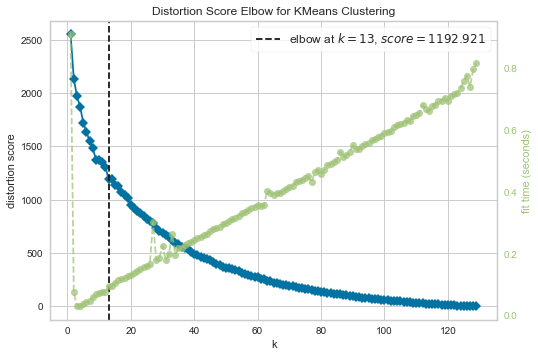

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

<IPython.core.display.Javascript object>

In [44]:
hide_me
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 130))

visualizer.fit(X_T)  # Fit the data to the visualizer
visualizer.show()

## DBSCAN (Density-based spatial clustering of applications with noise) 
is actually an unsupervised machine learning algorithm by itself, but is often used as an Exploratory Data Analysis technique as it reveals natural clusters in the data. The graph above has grouped the remaining 130 features (or skills) into 16 clusters. Those will be used below to find features of importance.
 - DBSCAN does not require us that the number of clusters be specified a-priori (beforehand), avoids outliers, and works quite well with arbitrarily shaped and sized clusters.

The silhouette ranges from −1 to +1, with a high value indicating that the object is well matched to its own cluster and poorly matched to neighboring clusters. So a value closer to 0, like ours here, indicates the clusters aren't well separated and share similarity to other clusters, which matches what we see with feature variance in that not many features are causing a high amount of variance in the predictive analysis.

In [120]:
kmeans = KMeans(n_clusters=13).fit(X_130)
normalized_vectors = preprocessing.normalize(X_130)
normalized_kmeans = KMeans(n_clusters=13).fit(normalized_vectors)
min_samples = X_130.shape[1] + 1
dbscan = DBSCAN(eps=3.5, min_samples=min_samples).fit(X_130)
# Print results
print(
    "kmeans: {0:10.5f}".format(
        silhouette_score(X_130, kmeans.labels_, metric="euclidean")
    )
)
print(
    "Cosine kmeans:{0:10.5f}".format(
        silhouette_score(
            normalized_vectors, normalized_kmeans.labels_, metric="cosine"
        ),
    )
)

kmeans:    0.06666
Cosine kmeans:   0.12784


<IPython.core.display.Javascript object>

In [121]:
# aggregating the data based on the generated clusters and retrieving the mean value per variable
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(X_130))
df_scaled["dbscan"] = dbscan.labels_
df_mean = df_scaled.loc[df_scaled.dbscan != -1, :].groupby("dbscan").mean()
df_mean[df_mean > 0.002]

0    1         2        3         4         5         6    \
dbscan                                                                   
0       0.037915  NaN  0.012638  0.35545  0.052133  0.004739  0.004739   

             7         8         9    ...       120      121       122  \
dbscan                                ...                                
0       0.006319  0.017378  0.107425  ...  0.011058  0.00316  0.006319   

            123  124       125       126  127       128       129  
dbscan                                                             
0       0.00316  NaN  0.014218  0.042654  NaN  0.085308  0.006319  

[1 rows x 130 columns]

<IPython.core.display.Javascript object>

The DBSCAN algorithm should be used to find associations and structures in data that are hard to find manually but that can be relevant and useful to find patterns and predict trends. Below, we select the top ten (10) variables with the highest variance. A high variance indicates that this variable is likely to play an important role in creating the clusters.

<AxesSubplot:xlabel='dbscan', ylabel='value'>

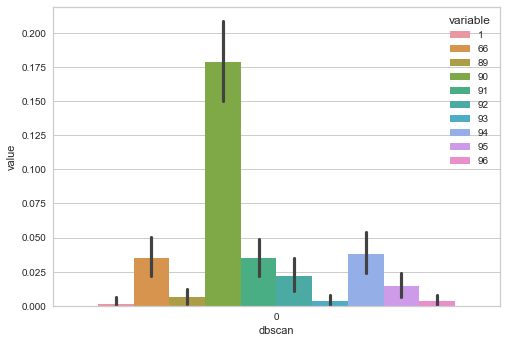

<IPython.core.display.Javascript object>

In [122]:
hide_me

results = pd.DataFrame(columns=["Variable", "Var"])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
selected_columns = (
    list(
        results.sort_values(
            "Var",
            ascending=False,
        )
        .head(10)
        .Variable.values
    )
    + ["dbscan"]
)
tidy = df_scaled[selected_columns].melt(id_vars="dbscan")
sns.barplot(x="dbscan", y="value", hue="variable", data=tidy)

In [124]:
hide_me
print(X.columns.to_numpy()[66])
print(X.columns.to_numpy()[89])
print(X.columns.to_numpy()[90])
print(X.columns.to_numpy()[91])
print(X.columns.to_numpy()[92])
print(X.columns.to_numpy()[93])
print(X.columns.to_numpy()[94])

Microsoft
SASS
SCSS
SQL
Scikit-learn
Scrum
Selenium


<IPython.core.display.Javascript object>

As you can see, "important features" returned still doesn't really make sense. Let's run RFE one more time before applying our final dimensionality reduction technique...

In [49]:
# Performing RFE
rForest = RandomForestClassifier()
rfe = RFE(rForest, 75).fit(X_130, y)
# Rank of 1 indicates the features selected
print(rfe.ranking_)

[31 19  1  1  1  1  1  3  1  1  1 44 38 25 36  1  1 28  1  1  1 55 37 29
 53  1  1  1  1 27  1 30 13  1  1 56 32 17  1  1  1  1  6 50 48  1  1  1
  1 10 46  1 43  1  1  1 11 40  1  1  1  1  1  1 16  4 20  1  1 45  1  1
  9  1 14  1  1  1  1  1  7 15  5  1  1  1  1  1  1  2  1  1  1 12  1  1
 42 34 41  1 22  1 51 26 18  1 21  1 52  1  1 35  1  1 47  8  1  1  1  1
  1 49  1 24 54 33  1 23  1 39]


<IPython.core.display.Javascript object>

In [50]:
# returns bool arr of True for features_selected
selection = rfe.get_support(1)  # the most important features
print("The dataset now consists of", len(selection), "features.")

The dataset now consists of 75 features.


<IPython.core.display.Javascript object>

In [51]:
X = X_130[X_130.columns[selection]]
X.columns

Index(['adobe photoshop', 'agile', 'ajax', 'algorithms', 'amazon api',
       'amazon web services (aws)', 'android', 'angular js', 'apache spark',
       'api', 'architecture', 'asp.net', 'atom', 'aws lambda', 'azure',
       'backbone.js', 'bitbucket', 'brand design', 'cassandra', 'chrome apps',
       'confluence', 'cordova', 'css3', 'd3', 'data structures',
       'data warehouse', 'database design', 'database modeling', 'django',
       'drupal', 'eclipse', 'etl', 'flask', 'front-end', 'full-stack',
       'functional programming', 'functional testing', 'github', 'gradle',
       'grunt', 'hibernate', 'html5', 'intellij idea', 'java', 'jenkins',
       'jira', 'jquery', 'json', 'linux', 'macos', 'mapreduce', 'matlab',
       'microsoft sql server', 'mongodb', 'mysql', 'node.js',
       'object-oriented programming (oop)', 'oracle', 'pandas', 'postgresql',
       'python 3', 'react.js', 'rest', 'ruby on rails (ror)', 'salesforce',
       'scikit-learn', 'selenium webdriver', 'subli

<IPython.core.display.Javascript object>

### Combining Clustering & Correlation techniques to visualize patterns amongst 75 features

In [52]:
crossed = pd.crosstab(ex_skills["skills"], ex_skills["profile"])
mask = crossed.index.isin(list(X.columns))
df = crossed[mask]

<IPython.core.display.Javascript object>

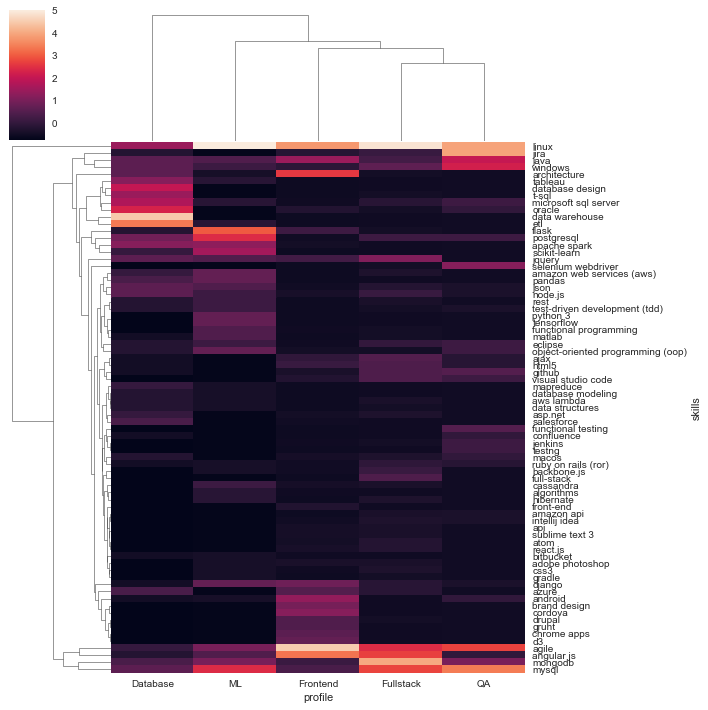

<IPython.core.display.Javascript object>

In [53]:
hide_me

# Set y_ticks
y_axis_labels = list(df.index)
# Normalize the data
df_norm_col = (df - df.mean()) / df.std()
# Plot the data
ax = sns.clustermap(df_norm_col, yticklabels=y_axis_labels)


## Factor Analysis

In [54]:
factor_data = X.set_index(y)

<IPython.core.display.Javascript object>

In [55]:
X_factor = factor_data.iloc[:, :]
y_factor = factor_data.index


<IPython.core.display.Javascript object>

In [56]:
# Using Kaiser-Meyer-Olkin (KMO) value to validate adequate sample size
kmo_all, kmo_model = calculate_kmo(X_factor)
kmo_model


0.6558755597107021

<IPython.core.display.Javascript object>

In order to conduct exploratory factor analysis, the Kaiser-Meyer-Olkin (KMO) value must be greater than 0.5, as this shows that the sample size is fit for factor analysis. The closer the value is to 1, the better. 
Although the below calculated KMO value isn't ideal, it indicates that factor analysis is viable. This value could be improved upon with a bigger sample size, i.e. by collecting more data.

In [57]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation="varimax")
fa.fit(X_factor)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

<IPython.core.display.Javascript object>

In [58]:
# Check Eigenvalues
ev, v = fa.get_eigenvalues()

<IPython.core.display.Javascript object>

An eigenvalue returned by factor analysis that is greater than 1, is considered as selection criteria for the feature. This is because the eigenvalue represents the amount of variance created by that variable. So an eigenvalue with a value of 4.04, for example, accounts for variance created by 4.04 variables.

In [59]:
ev

array([4.91518228, 2.29588313, 1.99308957, 1.88688098, 1.70997501,
       1.69771204, 1.5755154 , 1.53030029, 1.50020313, 1.45643414,
       1.43609347, 1.4175499 , 1.41075896, 1.36702695, 1.3398418 ,
       1.31049029, 1.27258861, 1.24689007, 1.21062075, 1.1822145 ,
       1.15680871, 1.15078114, 1.12713796, 1.09960633, 1.08674909,
       1.07234352, 1.06698192, 1.03946814, 1.03124044, 1.03094246,
       1.00847774, 0.98831896, 0.97246392, 0.94451836, 0.9280581 ,
       0.91027737, 0.89903532, 0.87982452, 0.86352413, 0.85161877,
       0.83762919, 0.82462952, 0.81338947, 0.81146522, 0.7862058 ,
       0.78357843, 0.76210535, 0.75812805, 0.72910795, 0.71699289,
       0.70055464, 0.69523918, 0.68866463, 0.67177937, 0.65566597,
       0.65256394, 0.62847992, 0.61636396, 0.61256234, 0.58842871,
       0.58197352, 0.57430816, 0.54848706, 0.54608326, 0.51111441,
       0.49355495, 0.48526343, 0.44573634, 0.42887038, 0.41506291,
       0.40831198, 0.37214712, 0.35005322, 0.32748483, 0.31458

<IPython.core.display.Javascript object>

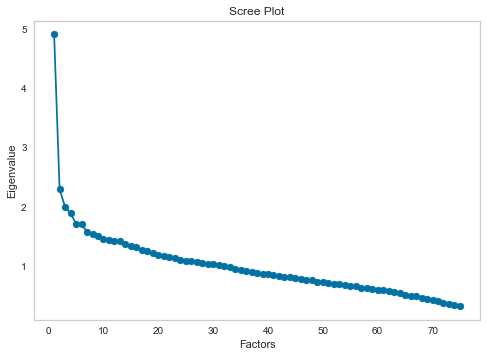

<IPython.core.display.Javascript object>

In [60]:
hide_me
# Create scree plot using matplotlib
plt.scatter(range(1, X_factor.shape[1] + 1), ev)
plt.plot(range(1, X_factor.shape[1] + 1), ev)
plt.title("Scree Plot")
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.grid()
plt.show()


In [61]:
fa_loadings = pd.DataFrame(
    fa.loadings_, columns=["Fact1_loadings_", "Fact2_loadings_", "Fact3_loadings_"]
)
fa_loadings["Original_Factors"] = list(X_factor.columns)
fa_loadings["Factor_1"] = np.where(fa_loadings["Fact1_loadings_"] > 0.2, "Factor_1", "")
fa_loadings["Factor_2"] = np.where(fa_loadings["Fact2_loadings_"] > 0.2, "Factor_2", "")
fa_loadings["Factor_3"] = np.where(fa_loadings["Fact3_loadings_"] > 0.2, "Factor_3", "")
fa_loadings[:50]


Fact1_loadings_  Fact2_loadings_  Fact3_loadings_  \
0         -0.019569         0.180942        -0.039029   
1          0.462027        -0.273324        -0.157905   
2         -0.237224        -0.145952        -0.105836   
3          0.003771         0.110218        -0.002936   
4         -0.063570        -0.050185        -0.028124   
5          0.031250         0.208055         0.042439   
6          0.578254        -0.180015        -0.090676   
7          0.264016        -0.271072        -0.169708   
8          0.061529         0.073076         0.237024   
9         -0.100060        -0.097316        -0.060005   
10         0.693844        -0.262321        -0.102541   
11        -0.085797        -0.086470         0.108700   
12        -0.100893        -0.065718        -0.053972   
13        -0.004488         0.104100         0.011379   
14         0.350717        -0.190248        -0.002322   
15        -0.099372        -0.007803        -0.058808   
16        -0.038978         0.039526        -0.001120   
17         0.370939        -0.139070        -0.045712   
18         0.061068         0.004553         0.125749   
19         0.477984        -0.208899        -0.086949   
20        -0.028431        -0.014847        -0.006440   
21         0.524395        -0.215271        -0.099046   
22        -0.075770        -0.017265        -0.035697   
23         0.463116        -0.186190        -0.114857   
24        -0.013472         0.092676        -0.018942   
25        -0.016037        -0.132079         0.693989   
26        -0.024603        -0.013248         0.189210   
27         0.030628         0.133586        -0.001755   
28         0.521466        -0.156280        -0.123433   
29         0.416043        -0.208259        -0.076349   
30        -0.039944         0.115842        -0.018546   
31        -0.006641        -0.084936         0.572729   
32         0.330365        -0.033487        -0.092682   
33        -0.047888         0.128529        -0.003998   
34        -0.007957         0.233659         0.004224   
35        -0.023400         0.093922        -0.017655   
36        -0.044524         0.021112         0.019863   
37        -0.128791         0.012451        -0.073662   
38        -0.013538         0.045806        -0.012070   
39         0.418741        -0.168577        -0.069318   
40        -0.008794         0.051549        -0.025513   
41        -0.232261        -0.140810        -0.113188   
42        -0.089011        -0.053922        -0.037151   
43         0.485971        -0.078251        -0.081283   
44         0.022166         0.132975         0.032607   
45        -0.221589        -0.075863        -0.039207   
46        -0.196475         0.007406        -0.009899   
47         0.005947         0.285297        -0.010518   
48         0.133980        -0.348926        -0.245785   
49        -0.006988         0.244086         0.026636   

             Original_Factors  Factor_1  Factor_2  Factor_3  
0             adobe photoshop                                
1                       agile  Factor_1                      
2                        ajax                                
3                  algorithms                                
4                  amazon api                                
5   amazon web services (aws)            Factor_2            
6                     android  Factor_1                      
7                  angular js  Factor_1                      
8                apache spark                      Factor_3  
9                         api                                
10               architecture  Factor_1                      
11                    asp.net                                
12                       atom                                
13                 aws lambda                                
14                      azure  Factor_1                      
15                backbone.js                                
16                  bitbucket             

<IPython.core.display.Javascript object>

### The newly created latent factors, i.e. features created from the observable features:

In [62]:
hide_me
Factor_1 = []
Factor_2 = []
Factor_3 = []
for idx, row in fa_loadings.iterrows():
    if row.Fact1_loadings_ > 0.1:
        Factor_1.append(row.Original_Factors)
    elif row.Fact2_loadings_ > 0.1:
        Factor_2.append(row.Original_Factors)
    elif row.Fact3_loadings_ > 0.1:
        Factor_3.append(row.Original_Factors)
print("Factor_1: ", Factor_1)
print("Factor_2: ", Factor_2)
print("Factor_3: ", Factor_3)

Factor_1:  ['agile', 'android', 'angular js', 'architecture', 'azure', 'brand design', 'chrome apps', 'cordova', 'd3', 'django', 'drupal', 'flask', 'grunt', 'java', 'linux', 'oracle']
Factor_2:  ['adobe photoshop', 'algorithms', 'amazon web services (aws)', 'aws lambda', 'database modeling', 'eclipse', 'front-end', 'full-stack', 'jenkins', 'json', 'macos', 'mapreduce', 'matlab', 'node.js', 'object-oriented programming (oop)', 'pandas', 'postgresql', 'python 3', 'rest', 'ruby on rails (ror)', 'scikit-learn', 'test-driven development (tdd)', 'testng']
Factor_3:  ['apache spark', 'asp.net', 'cassandra', 'data warehouse', 'database design', 'etl', 'microsoft sql server', 't-sql', 'tableau', 'tensorflow']


<IPython.core.display.Javascript object>

How can the viability of the returned factors be measured? With the Cronbach alpha, factors can be measured to determine whether or not the variables of a factor form a “coherent” and reliable factor. A value above 0.6 for the alpha is in practice deemed acceptable. Here the Cronbach alpha is calculated using the pingouin package:

In [63]:
# Create the factors
factor1 = factor_data[Factor_1]
factor2 = factor_data[Factor_2]
factor3 = factor_data[Factor_3]

<IPython.core.display.Javascript object>

In [64]:
# Get cronbach alpha
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)

print(
    "factor1_alpha: ",
    factor1_alpha,
    "\nfactor2_alpha: ",
    factor2_alpha,
    "\nfactor3_alpha: ",
    factor3_alpha,
)


factor1_alpha:  (0.8008740645264139, array([0.777, 0.823])) 
factor2_alpha:  (0.43254605722849343, array([0.367, 0.495])) 
factor3_alpha:  (0.47037097717016946, array([0.407, 0.53 ]))


<IPython.core.display.Javascript object>

# This exploration in dimensionality reduction provided insight on the relationships beteween features. While we did need to pair down the number of features from where we started at 812, there did appear to be a point at which the model's performance suffered when feature pruning went too far. One topic for further investigation would be to analyze the optimal number of features for each model. But for the sake of our analysis, a dataset consisting of 118 features appeared to yield the best results. We use this dataset to train:
 - Logistic Regression
 - Decision Tree
 - Random Forest

# Logistic Regression

In [114]:
# Read in csv of data whose features have been reduced to yield optimal results
data = pd.read_csv("5_profiles/reduced_dim_5.csv")

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Showing Correlation Amongst Skills')

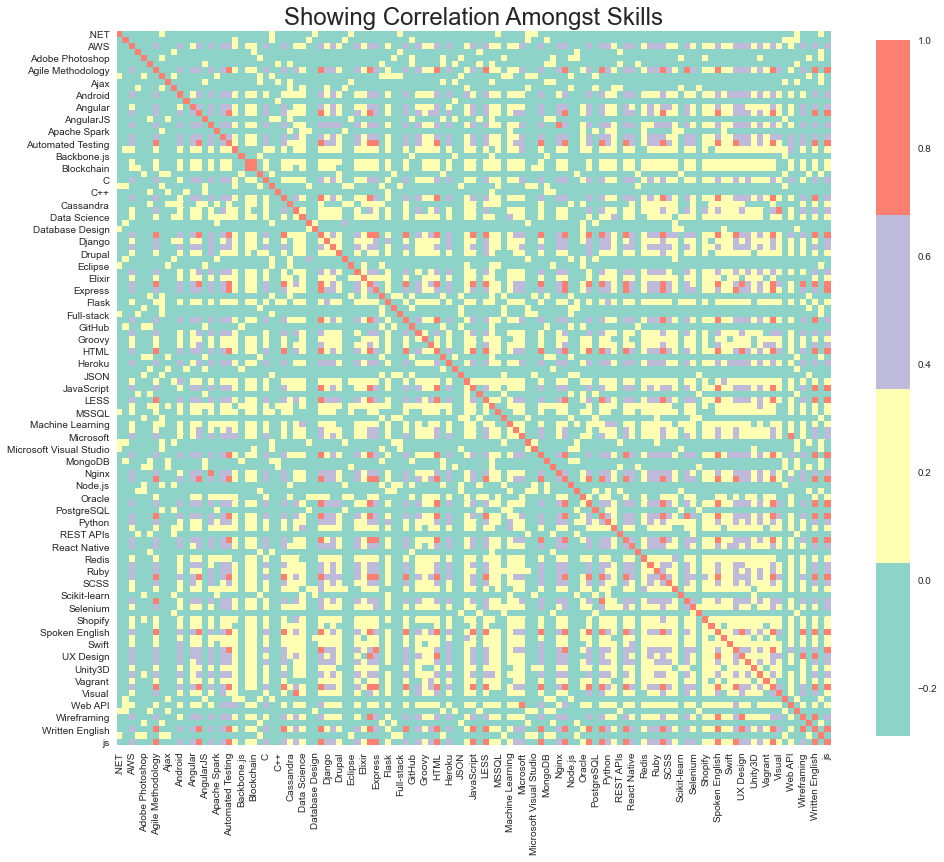

<IPython.core.display.Javascript object>

In [66]:
hide_me
fig, ax = plt.subplots(figsize=(16, 16))

data_corr = data.corr()
cmap = sns.mpl_palette("Set3", 4)

# Generate a Heatmap
sns.heatmap(data_corr, cbar_kws={"shrink": 0.8}, square=True, cmap=cmap)

# title
title = "Showing Correlation Amongst Skills"
plt.title(title, loc="center", fontsize=24)

In [115]:
# Convert target class to binary variable, allowing this to be treated as a One V. Rest classification problem
data["Frontend"] = np.where(data["profile"] == "Frontend", 1, 0)

<IPython.core.display.Javascript object>

In [68]:
print(Fore.WHITE, data.profile.value_counts(normalize=True))


 Frontend     0.459355
Fullstack    0.207742
QA           0.162581
Database     0.090323
ML           0.080000
Name: profile, dtype: float64


<IPython.core.display.Javascript object>

# Visualizing Class Balance
It's important that classes be balanced because with strong class imbalance, a model can seem to perform well simply by predicting that every class is the majority class. But this is not indicative of overall model accuracy.

Percentage of frontend developers is:  45.94 %
Percentage of non-frontend developers:  54.06 %


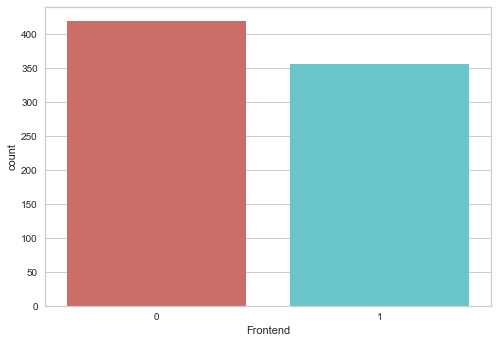

<IPython.core.display.Javascript object>

In [69]:
hide_me
# Looking at Class Imbalance
sns.countplot(x="Frontend", data=data, palette="hls")
print(
    "Percentage of frontend developers is: ",
    "{:.2f}".format(len(data[data["profile"] == "Frontend"]) / len(data) * 100),
    "%",
)
print(
    "Percentage of non-frontend developers: ",
    "{:.2f}".format(
        (len(data) - len(data[data["profile"] == "Frontend"])) / len(data) * 100
    ),
    "%",
)
plt.show()

In [116]:
# Generating X (feature) variable & y (target) variable
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1].to_numpy()
# Splitting the data to a train and test set
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.33, random_state=0)

<IPython.core.display.Javascript object>

# Fitting the Logistic Regression Model to our Data

In [117]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

<IPython.core.display.Javascript object>

# Measuring Model Performance
 - Accuracy
 - The Confusion Matrix
 - The Classification Report
 - ROC_AUC_score
 - ROC Curve

# Scoring Metrics
Accuracy can be a useful measure when the same amount of samples exist per class in a dataset. But with an imbalanced set of samples, accuracy is biased to the size of the test data. A more robust scoring metric is the f1 metric, used along with cross_val_score to score the model across multiple test runs.

In [119]:
# Generating predictions by which to measure accuracy of the fitted model
y_pred = logreg.predict(X_test)
print(
    "The f1 score of the logistic regression classifier on test set: {}".format(
        np.mean(cross_val_score(logreg, X_test, y_test, scoring="f1", cv=5))
    ),
)

The f1 score of the logistic regression classifier on test set: 0.8344858393638882


<IPython.core.display.Javascript object>

# The Confusion Matrix
This is the basis from which all other metrics are calculated. It provides a simple, but clear, picture which shows how the model is performing.

<AxesSubplot:>

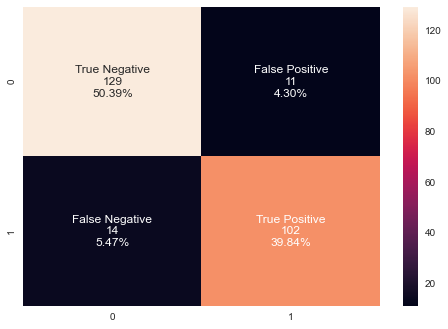

<IPython.core.display.Javascript object>

In [73]:
hide_me
# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cm, annot=labels, fmt="")


# The ROC Curve

This is a commonly used curve that summarizes the performance of a classifier over all possible thresholds. It's generated by plotting the True Positive Rate (y-axis) against the False Positive Rate (x-axis) as the threshold for assigning observations to a given class is varied.

In [74]:
# Predict probabilities
y_score = logreg.predict_proba(X_test)[:, 1]
# False Positive & True Postive rates to be used to plot the ROC Curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)

<IPython.core.display.Javascript object>

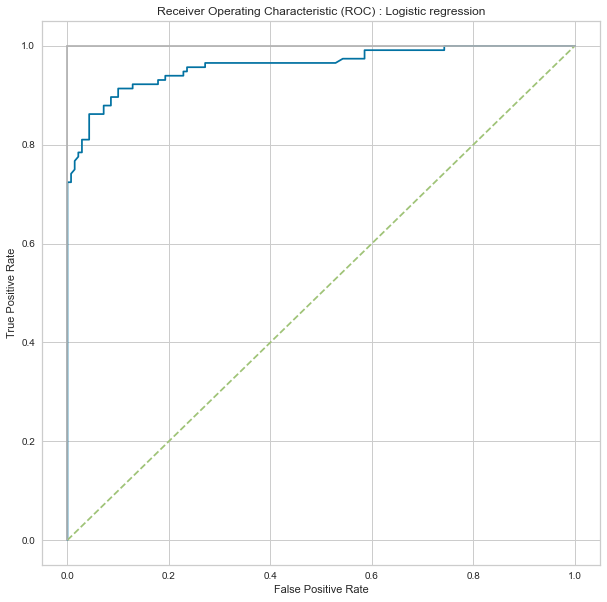

<IPython.core.display.Javascript object>

In [75]:
hide_me
plt.subplots(1, figsize=(10, 10))
plt.title("Receiver Operating Characteristic (ROC) : Logistic regression")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

# ROC_AUC Score
In order to return one number that reveals how good the ROC_AUC curve is, calculate the Area Under the ROC Curve, or the ROC_AUC score. This tells us how good the model is at ranking predictions.

In [76]:
# The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes
print(
    "The roc_auc_score for the Logistic Regression classifier: ",
    "{}".format(roc_auc_score(y_test, y_score)),
)

The roc_auc_score for the Logistic Regression classifier:  0.9600369458128077


<IPython.core.display.Javascript object>

All this indicates the model is performing very well. However, this is a case in which the classes are almost perfectly balanced, with many samples of the "Frontend" profile type. Let's look at how the model performs when classes are not balanced and when the profile does not use technologies as distinct as those used by Frontend developers. Fullstack developers definitely use technologies used by both Database programmers and by Frontend, not to mention QA engineers should they be testing their products. This is a slightly harder problem, but one to which we're able to apply techniques in order to yield the best results.

In [77]:
# Generating a column with binary Fullstack variable
data["Fullstack"] = np.where(data["profile"] == "Fullstack", 1, 0)

<IPython.core.display.Javascript object>

In [78]:
selected_columns = list(X.columns)

<IPython.core.display.Javascript object>

# Logistic Regression with PySpark

In [79]:
conf = SparkConf()
conf.setMaster("local")
conf.setAppName("AppName")
sqlCtx = SQLContext(sc)


<IPython.core.display.Javascript object>

In [80]:
sdf = sqlCtx.createDataFrame(data)


<IPython.core.display.Javascript object>

# Transforming the Data to Spark

In [81]:
# Build a dict (orginal column name: new column name)
mapping = {col: col.replace(".", "_").replace(" ", "_") for col in selected_columns}


<IPython.core.display.Javascript object>

In [82]:
# Select all columns and create an alias if there is a mapping for this column
df_renamed = sdf.select(
    [F.col("`" + c + "`").alias(mapping.get(c, c)) for c in sdf.columns]
)


<IPython.core.display.Javascript object>

In [83]:
# Create a VectorAssembler obj using the renamed columns as input
assembler = VectorAssembler(inputCols=list(mapping.values()), outputCol="features")


<IPython.core.display.Javascript object>

In [84]:
transformed_data = assembler.transform(df_renamed)


<IPython.core.display.Javascript object>

In [85]:
# Rename "Fullstack" column to "label"
data = transformed_data.withColumnRenamed("Fullstack", "label")


<IPython.core.display.Javascript object>

# Imbalancing handling
In our dataset (train) we have 36.04 % negatives and 63.96 % positives. Since positives are in a majority. Therefore, logistic loss objective function should treat the negative class (Outcome == 0) with higher weight. For this purpose we calculate the BalancingRatio as follows:

In [86]:
numPositives = 353
dataset_size = 704
BalancingRatio = numPositives / dataset_size
print("BalancingRatio = {}".format(BalancingRatio))

BalancingRatio = 0.5014204545454546


<IPython.core.display.Javascript object>

Against every Outcome == 0, the calculated BalancingRatio is assigned to the corresponding row under the “classWeights” column. Likewise with every Outcome == 1, 1-BalancingRatio is assigned to the corresponding row in the “classWeights” column.

In [87]:
data = data.withColumn(
    "classWeights",
    F.when(data.label == 0, BalancingRatio).otherwise(1 - BalancingRatio),
)

<IPython.core.display.Javascript object>

In [88]:
# Split the data
(train, test) = data.randomSplit([0.66, 0.33])

<IPython.core.display.Javascript object>

#### Create PySpark Logistic Regression Model

In [89]:
from pyspark.ml.classification import LogisticRegression

# Create a logistic regression object
lr = LogisticRegression(
    featuresCol="features", labelCol="label", weightCol="classWeights", maxIter=100
)
lrModel = lr.fit(train)
trainingSummary = lrModel.summary

<IPython.core.display.Javascript object>

#### Generate Model Performance metrics

In [90]:
# Create both evaluators
evaluatorMulti = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction"
)
evaluator = BinaryClassificationEvaluator(
    labelCol="label", rawPredictionCol="prediction", metricName="areaUnderROC"
)

# Make predicitons
predictionAndTarget = lrModel.transform(test).select("label", "prediction")

# Get metrics
acc = evaluatorMulti.evaluate(
    predictionAndTarget, {evaluatorMulti.metricName: "accuracy"}
)
f1 = evaluatorMulti.evaluate(predictionAndTarget, {evaluatorMulti.metricName: "f1"})
weightedPrecision = evaluatorMulti.evaluate(
    predictionAndTarget, {evaluatorMulti.metricName: "weightedPrecision"}
)
weightedRecall = evaluatorMulti.evaluate(
    predictionAndTarget, {evaluatorMulti.metricName: "weightedRecall"}
)
auc = evaluator.evaluate(predictionAndTarget)
print("Logistic Regression Accuracy:", acc)
print("Logistic Regression Weighted Precision:", weightedPrecision)
print("Logistic Regression Weighted Recall:", weightedRecall)
print("Logistic Regression F1:", f1)
print("Logistic Regression AUC:", auc)

Logistic Regression Accuracy: 0.792156862745098
Logistic Regression Weighted Precision: 0.7835466284074606
Logistic Regression Weighted Recall: 0.792156862745098
Logistic Regression F1: 0.7871633447330835
Logistic Regression AUC: 0.6787612971823498


<IPython.core.display.Javascript object>

#### Visualize Model Performance

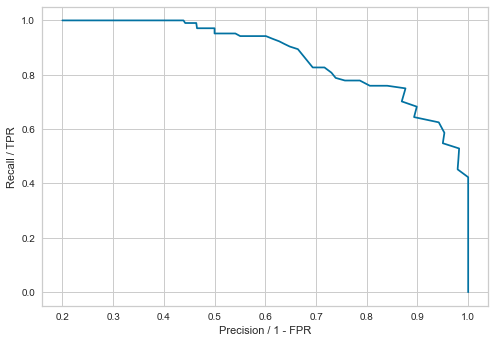

<IPython.core.display.Javascript object>

In [91]:
# Plot the recall-precision curve
pr = trainingSummary.pr.toPandas()
plt.plot(pr["precision"], pr["recall"])
plt.xlabel("Precision / 1 - FPR")
plt.ylabel("Recall / TPR")
plt.show()

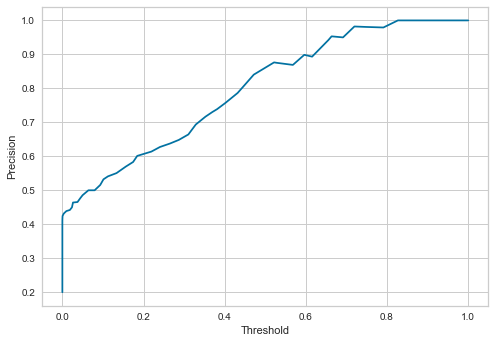

<IPython.core.display.Javascript object>

In [92]:
# Plot the threshold-precision curve
tp = trainingSummary.precisionByThreshold.toPandas()
plt.plot(tp["threshold"], tp["precision"])
plt.xlabel("Threshold")
plt.ylabel("Precision")
plt.show()

# Binary Decision Tree

In [93]:
# Reading in csv with formatted data
data = pd.read_csv("5_profiles/reduced_dim_5.csv")

<IPython.core.display.Javascript object>

In [94]:
data

profile  .NET  ASP.NET  AWS  AWS S3  Adobe Photoshop  Agile  \
0    Fullstack     0        0    0       0                0      0   
1     Frontend     0        0    0       0                0      0   
2           ML     0        0    0       0                0      0   
3           ML     0        0    0       0                0      0   
4           QA     0        0    0       1                0      0   
..         ...   ...      ...  ...     ...              ...    ...   
770   Frontend     0        0    0       0                0      0   
771   Frontend     0        0    0       0                0      0   
772   Frontend     0        0    0       0                0      0   
773         ML     0        0    0       0                0      0   
774  Fullstack     0        0    0       0                0      0   

     Agile Methodology  Agile Software Development  Ajax  ...  \
0                    0                           0     0  ...   
1                    0                           0     0  ...   
2                    0                           0     0  ...   
3                    0                           0     0  ...   
4                    0                           0     0  ...   
..                 ...                         ...   ...  ...   
770                  0                           0     0  ...   
771                  1                           0     0  ...   
772                  0                           0     0  ...   
773                  0                           0     0  ...   
774                  0                           0     0  ...   

     Version Control  Visual  Visual Studio  Web API  Windows  Wireframing  \
0                  0       0              0        0        0            0   
1                  1       0              0        0        0            0   
2                  0       0              0        0        0            0   
3                  0       0              0        0        0            0   
4                  0       0              0        0        0            0   
..               ...     ...            ...      ...      ...          ...   
770                0       0              0        0        0            0   
771                0       0              0        0        0            0   
772                1       0              0        0        0            1   
773                0       0              0        0        0            0   
774                0       0              0        0        0            0   

     WordPress  Written English  jQuery  js  
0            0                0       0   0  
1            0                1       0   1  
2            0                0       0   0  
3            0                0       0   0  
4            0                0       0   0  
..         ...              ...     ...  ..  
770          0                0       0   0  
771          0                1       0   1  
772          0                1       0   1  
773          0                0       0   0  
774          0                0       0   0  

[775 rows x 118 columns]

<IPython.core.display.Javascript object>

In [95]:
# Generating a column with binary Frontend variable
data["Frontend"] = np.where(data["profile"] == "Frontend", 1, 0)

<IPython.core.display.Javascript object>

In [96]:
# Generating the features variable
X = data.iloc[:, 1:-1]
# Generating the target variable
y = data.iloc[:, -1]

<IPython.core.display.Javascript object>

In [97]:
# Showing that y is a binary variable
y

0      0
1      1
2      0
3      0
4      0
      ..
770    1
771    1
772    1
773    0
774    0
Name: Frontend, Length: 775, dtype: int32

<IPython.core.display.Javascript object>

In [98]:
# Splitting to the data to test & train data
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.33, random_state=0)

<IPython.core.display.Javascript object>

# Fit the Decision Tree Model to our Data

In [99]:
# Generating the DecisionTree model
classifier = DecisionTreeClassifier()
# Fitting the model
classifier.fit(X_train, y_train)


DecisionTreeClassifier()

<IPython.core.display.Javascript object>

#### The Classification Report
While the below generated classification report reveals this Binary Decision Tree model to score an accuracy rate of 82%, a Multinomial (or Multi-class) model trained with exactly the same data and with the same model specifications will score an accuracy rate of 68% in predicting the five (5) classes present.

In [100]:
# Making predictions with the model
y_pred = classifier.predict(X_test)
# Generating the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.81      0.84       140
           1       0.79      0.85      0.82       116

    accuracy                           0.83       256
   macro avg       0.83      0.83      0.83       256
weighted avg       0.83      0.83      0.83       256



<IPython.core.display.Javascript object>

#### The ROC Curve

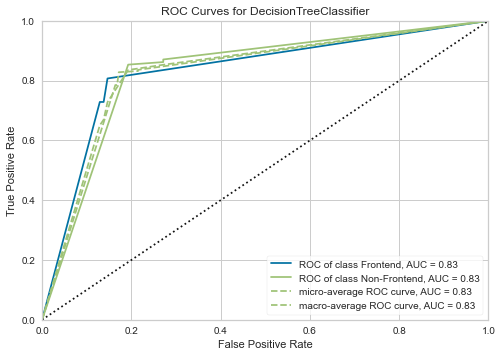

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

<IPython.core.display.Javascript object>

In [101]:
from yellowbrick.classifier import ROCAUC

# Instantiating the visualizer with the Decision Tree model
visualizer = ROCAUC(classifier, classes=["Frontend", "Non-Frontend"])

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()


## Visualizing the Decision Tree's Strcuture
The tree will stabilize at a max_depth of 125 on its own, but for the sake of this visual, the max_depth has been set to 25.

In [102]:
feature_names = X.to_numpy()
class_names = np.array(["Database", "Frontend", "Fullstack", "ML", "QA"])

<IPython.core.display.Javascript object>

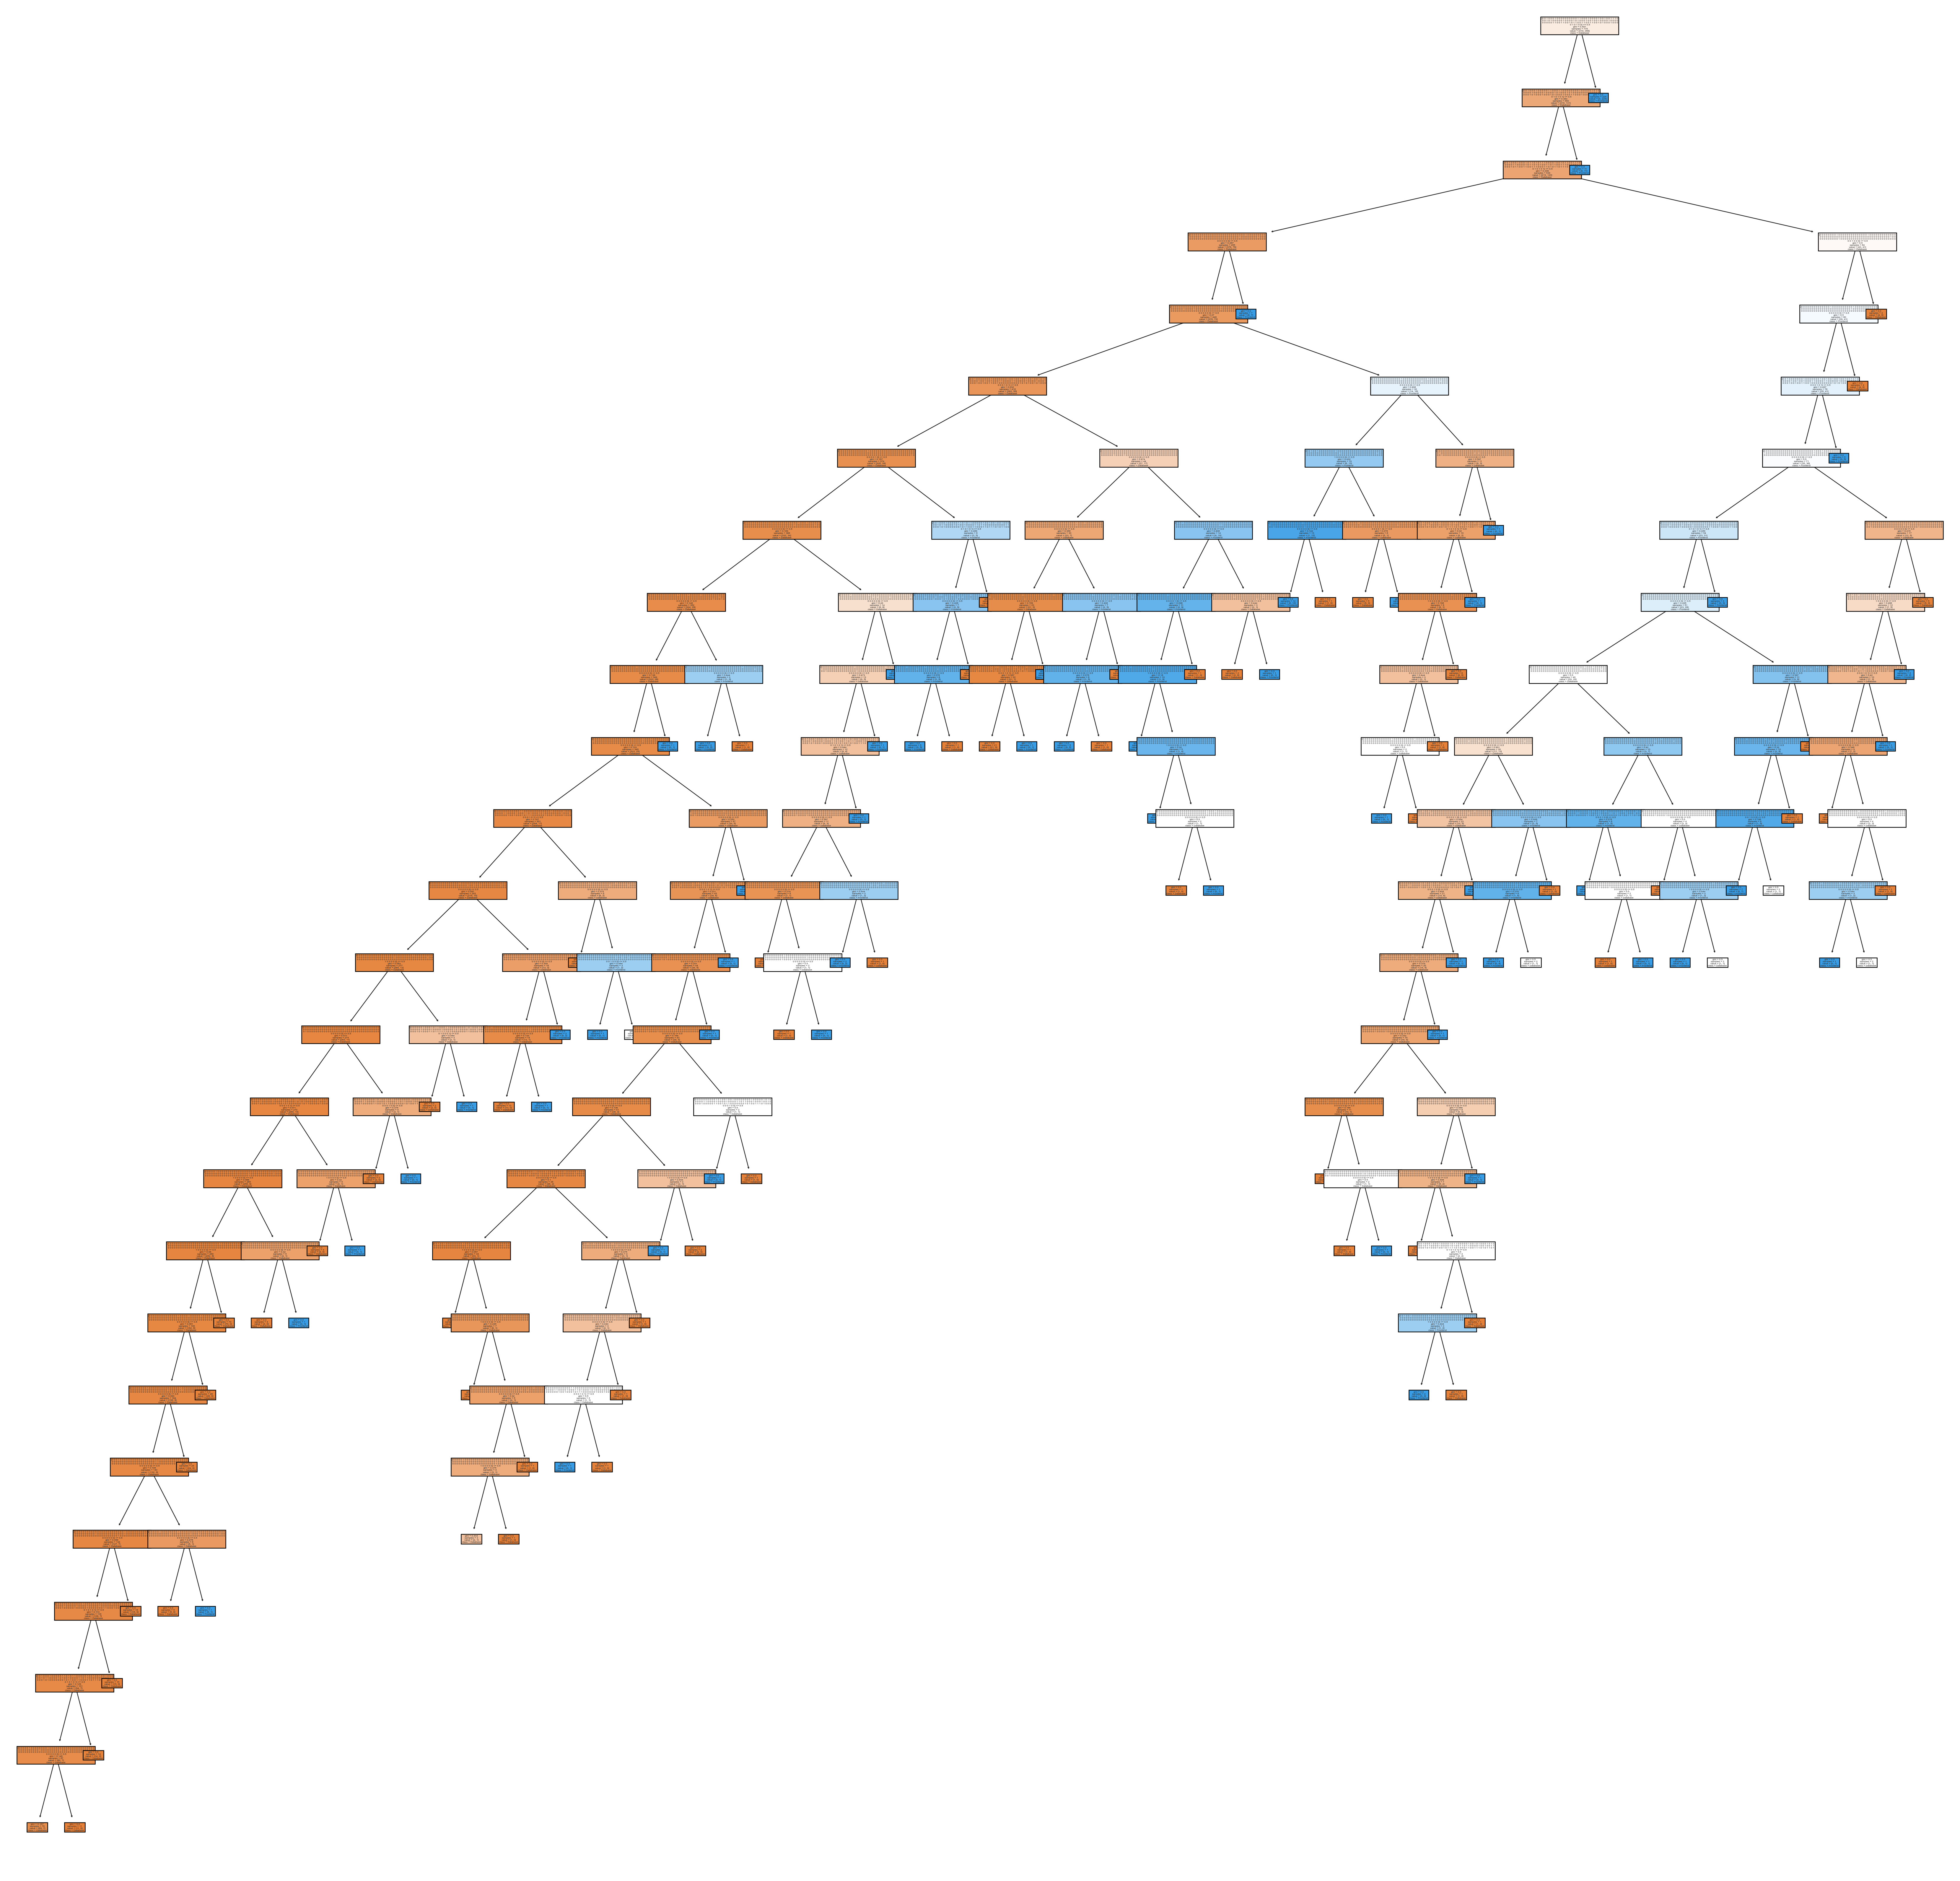

<IPython.core.display.Javascript object>

In [103]:
hide_me
clf = DecisionTreeClassifier(
    max_depth=25
)  # max_depth is maximum number of levels in the tree
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 14), dpi=600)
clf = clf.fit(X, y)
plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names)
fig.set_size_inches(3, 6)


In [104]:
clf.classes_

array([0, 1])

<IPython.core.display.Javascript object>

In [106]:
clf.n_classes_

2

<IPython.core.display.Javascript object>

# Multinomial Random Forest
Random Forests see high performance with data of high dimensionality. Furthermore, the algorithm handles outliers and unbalanced data well.

In [107]:
# Generate the target variable
y = data.iloc[:, 0]

<IPython.core.display.Javascript object>

In [108]:
# Show that y is a multinomial variable
y

0      Fullstack
1       Frontend
2             ML
3             ML
4             QA
         ...    
770     Frontend
771     Frontend
772     Frontend
773           ML
774    Fullstack
Name: profile, Length: 775, dtype: object

<IPython.core.display.Javascript object>

In [109]:
# Split to the data to test & train data
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.33, random_state=0)

<IPython.core.display.Javascript object>

# Fit the Random Forest Model to our Data

In [110]:
# Generate the RandomForest model
forest = RandomForestClassifier(class_weight="balanced", random_state=0)
# Fit the model
forest.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=0)

<IPython.core.display.Javascript object>

In [111]:
classes = ["Database", "Frontend", "Fullstack", "ML", "QA"]

<IPython.core.display.Javascript object>

# The Classification Report
- Precision — What percent of your predictions were correct?
- Recall — What percent of the positive cases did you catch?
- F1 score — What percent of positive predictions were correct?
- Support is the number of actual occurrences of the class in the specified dataset.

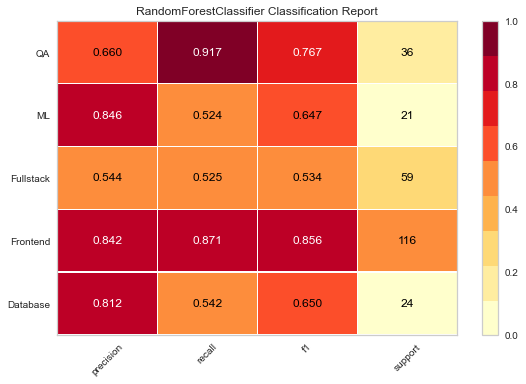

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

<IPython.core.display.Javascript object>

In [112]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(forest, classes=classes, support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

# The Multi-Class ROC Curve

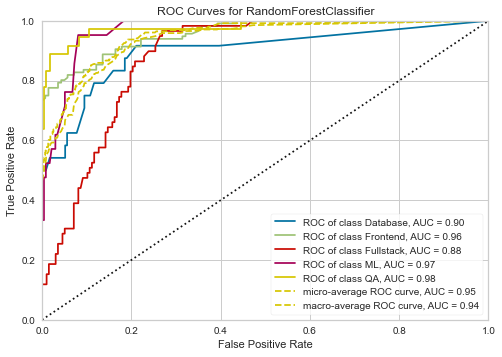

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

<IPython.core.display.Javascript object>

In [113]:
from yellowbrick.classifier import ROCAUC

# Instantiating the visualizer with the Random Forest model
visualizer = ROCAUC(forest, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()


# Conclusion
 <br>
 The original data's format required some creativite re-formatting in order to see it correctly processed by our Machine Learning algorithms. But ultimately, we were able to implement a binary classification problem with Logistic Regression & generate viable results with Multi-Class Random Forest model. Although these algorithms are powerful in their ability to make sense of data, it’s clear that the creativity and insight which only people can provide, will continue to be fundamental to the process of Machine Learning.
<br> <br>

# Future Work
 <br>
 In the future, I hope to investigate the information supplied by the predict.proba method in more depth. This method shows the probability that an observation belongs to a certain class. It sheds light on which samples the algorithm may be classifying with less certainty versus those classified with more certainty. A closer look at the skills of those profiles may lend insight as to which skills are determinative in predicting a profile type. 
<br> <br>